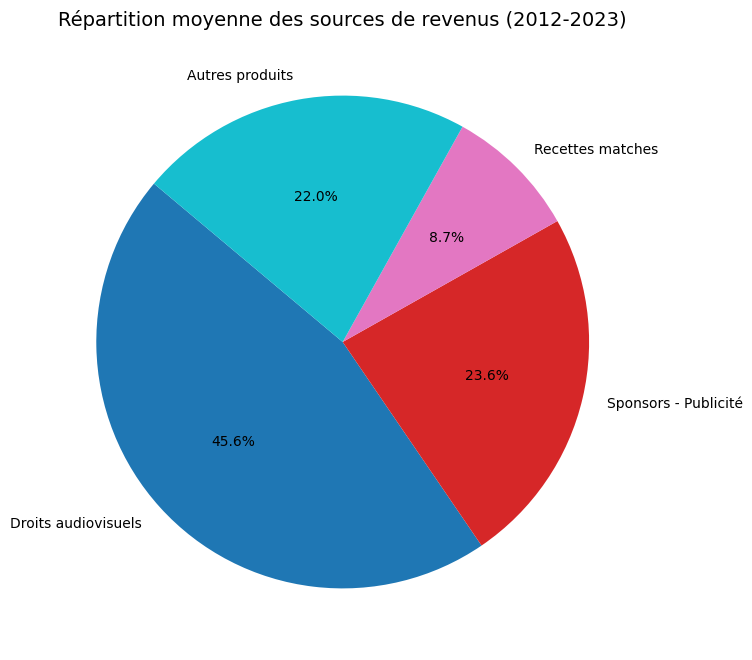

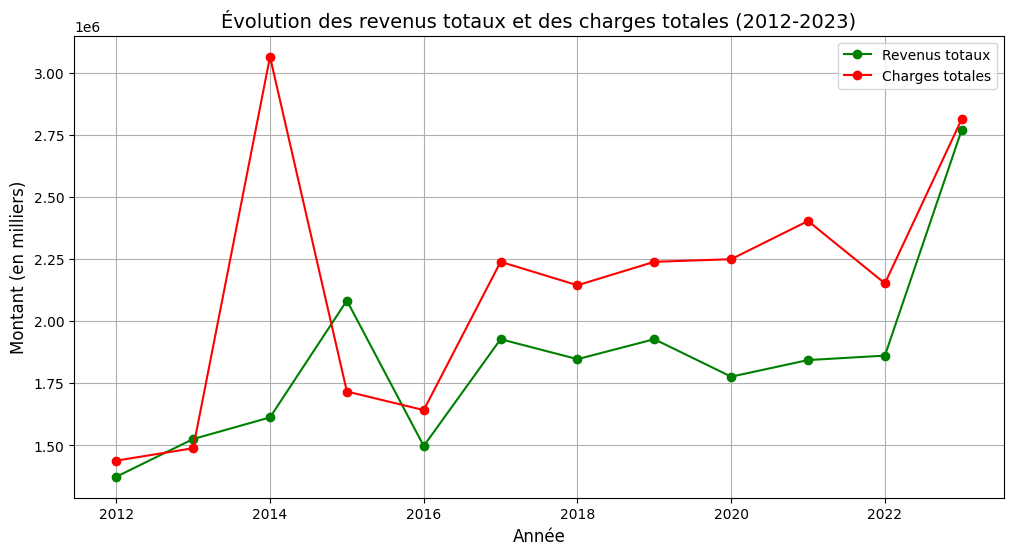

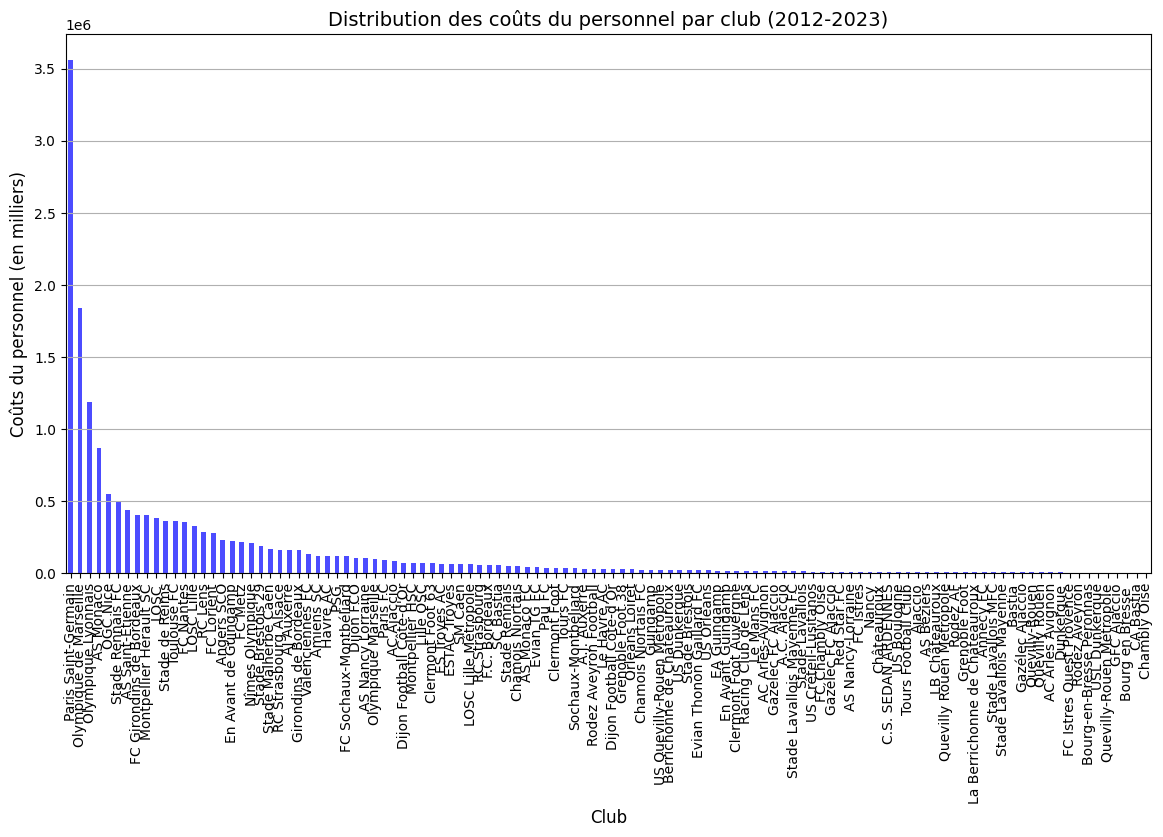

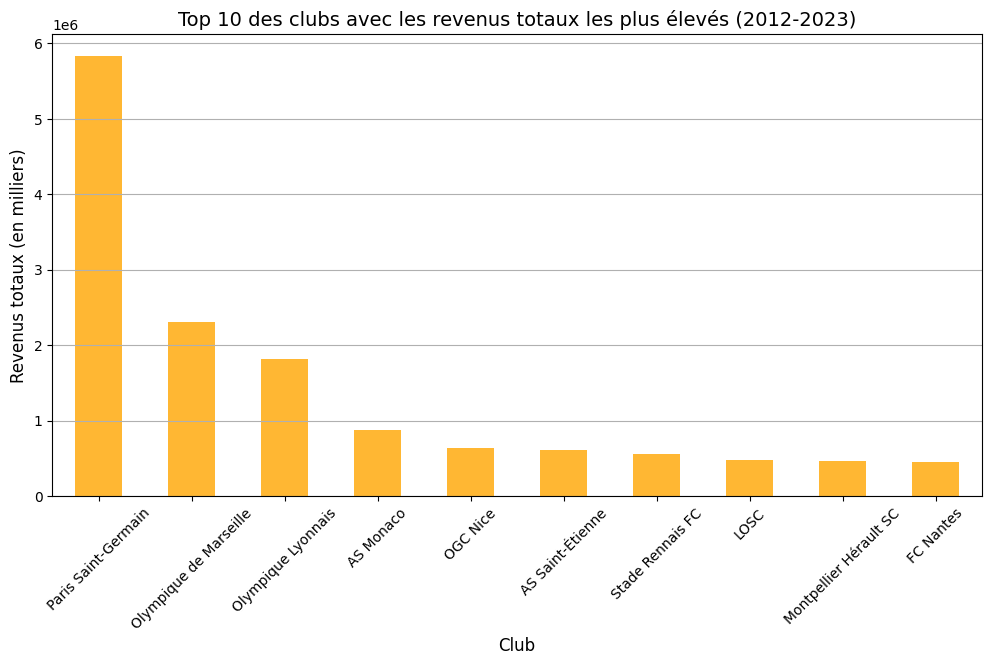

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv('/content/df_DNCG (8).csv')

# 1. Répartition moyenne des sources de revenus pour tous les clubs
sources_revenus = df[['Droits audiovisuels', 'Sponsors - Publicité', 'Recettes matches', 'Autres produits']].mean()

plt.figure(figsize=(8, 8))
sources_revenus.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap="tab10")
plt.title("Répartition moyenne des sources de revenus (2012-2023)", fontsize=14)
plt.ylabel("")
plt.show()

# 2. Évolution des revenus totaux et des charges totales au fil des ans
revenus_charges_annee = df.groupby('Année')[
    ['Droits audiovisuels', 'Sponsors - Publicité', 'Recettes matches', 'Autres produits', 'Rémunération personnel', 'Autres charges']
].sum()
revenus_totaux = revenus_charges_annee[['Droits audiovisuels', 'Sponsors - Publicité', 'Recettes matches', 'Autres produits']].sum(axis=1)
charges_totales = revenus_charges_annee[['Rémunération personnel', 'Autres charges']].sum(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(revenus_totaux, marker='o', label='Revenus totaux', color='green')
plt.plot(charges_totales, marker='o', label='Charges totales', color='red')
plt.title("Évolution des revenus totaux et des charges totales (2012-2023)", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Montant (en milliers)", fontsize=12)
plt.legend()
plt.grid()
plt.show()

# 3. Distribution des coûts du personnel par club
plt.figure(figsize=(14, 7))
df.groupby('Club')['Rémunération personnel'].sum().sort_values(ascending=False).plot(kind='bar', color='blue', alpha=0.7)
plt.title("Distribution des coûts du personnel par club (2012-2023)", fontsize=14)
plt.xlabel("Club", fontsize=12)
plt.ylabel("Coûts du personnel (en milliers)", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# 4. Top 10 des clubs avec les revenus totaux les plus élevés
revenus_club = df.groupby('Club')[['Droits audiovisuels', 'Sponsors - Publicité', 'Recettes matches', 'Autres produits']].sum().sum(axis=1)
top_10_clubs = revenus_club.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_clubs.plot(kind='bar', color='orange', alpha=0.8)
plt.title("Top 10 des clubs avec les revenus totaux les plus élevés (2012-2023)", fontsize=14)
plt.xlabel("Club", fontsize=12)
plt.ylabel("Revenus totaux (en milliers)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


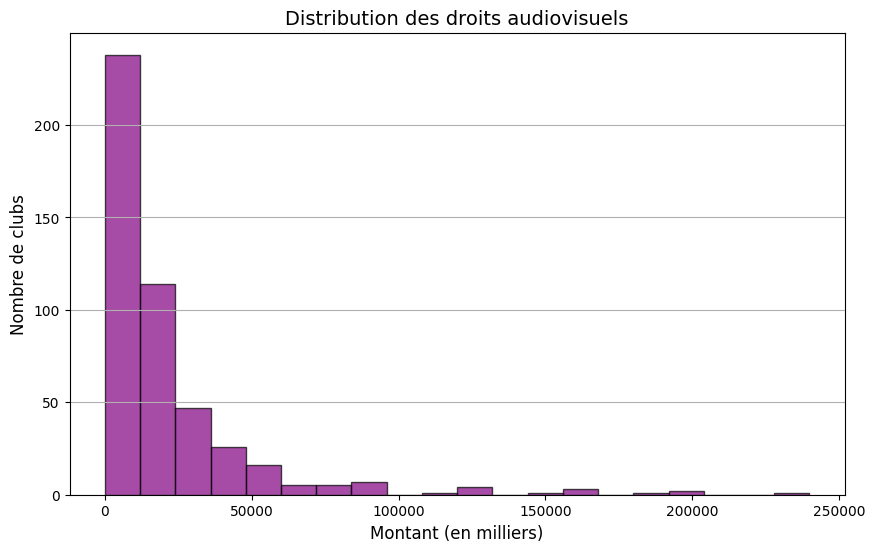

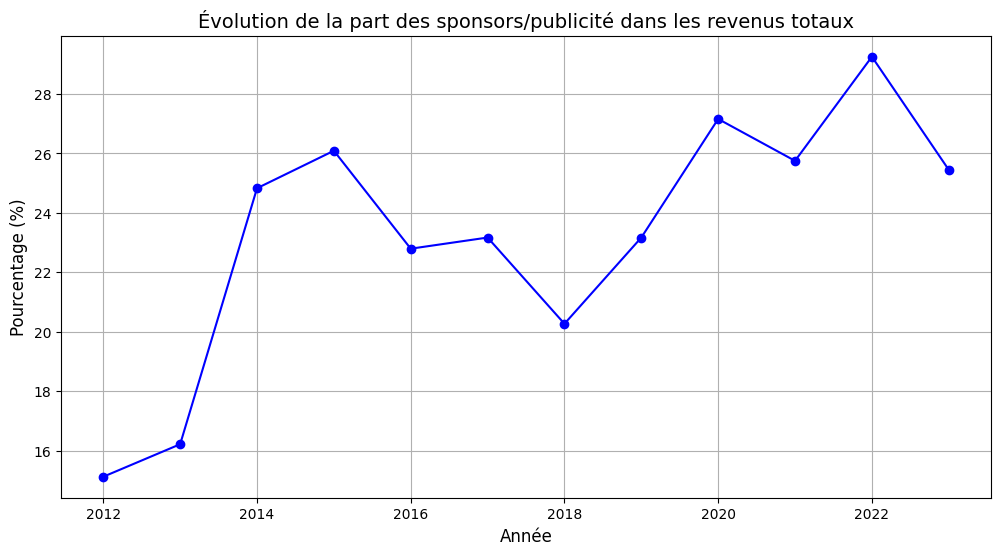

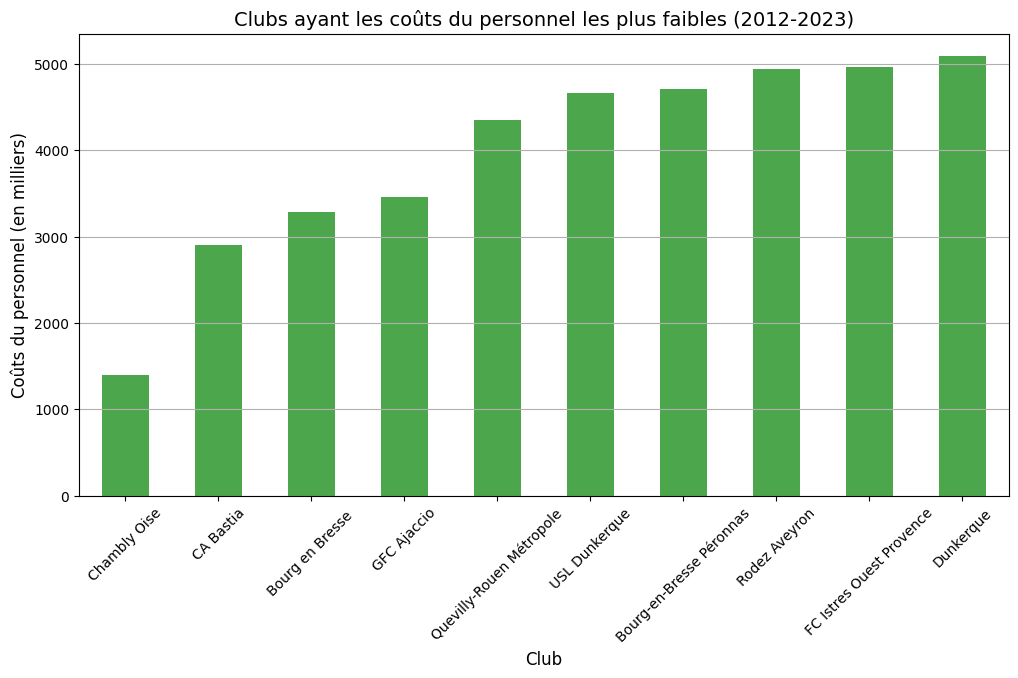

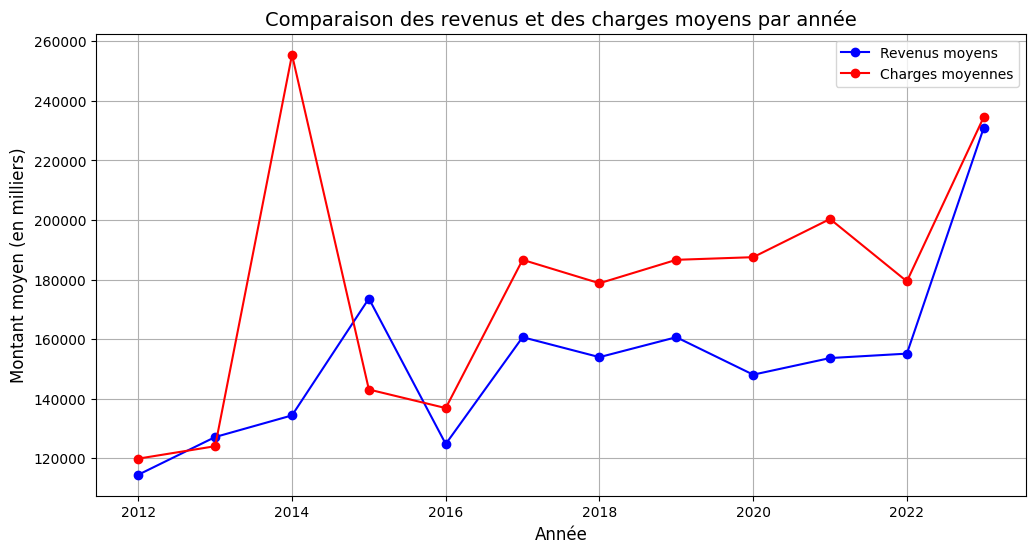

In [ ]:
# 1. Histogramme de la distribution des droits audiovisuels
plt.figure(figsize=(10, 6))
df['Droits audiovisuels'].plot(kind='hist', bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.title("Distribution des droits audiovisuels", fontsize=14)
plt.xlabel("Montant (en milliers)", fontsize=12)
plt.ylabel("Nombre de clubs", fontsize=12)
plt.grid(axis='y')
plt.show()

# 2. Évolution de la part des sponsors et de la publicité par rapport aux revenus totaux
df['Total revenus'] = df[['Droits audiovisuels', 'Sponsors - Publicité', 'Recettes matches', 'Autres produits']].sum(axis=1)
part_sponsors = df.groupby('Année')['Sponsors - Publicité'].sum() / df.groupby('Année')['Total revenus'].sum() * 100

plt.figure(figsize=(12, 6))
part_sponsors.plot(kind='line', marker='o', color='blue')
plt.title("Évolution de la part des sponsors/publicité dans les revenus totaux", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Pourcentage (%)", fontsize=12)
plt.grid()
plt.show()

# 3. Clubs ayant les coûts du personnel les plus faibles
clubs_bas_couts = df.groupby('Club')['Rémunération personnel'].sum().sort_values(ascending=True).head(10)

plt.figure(figsize=(12, 6))
clubs_bas_couts.plot(kind='bar', color='green', alpha=0.7)
plt.title("Clubs ayant les coûts du personnel les plus faibles (2012-2023)", fontsize=14)
plt.xlabel("Club", fontsize=12)
plt.ylabel("Coûts du personnel (en milliers)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 4. Comparaison des revenus et des charges moyens par année
revenus_moyens = revenus_charges_annee[['Droits audiovisuels', 'Sponsors - Publicité', 'Recettes matches', 'Autres produits']].sum(axis=1) / df['Année'].nunique()
charges_moyennes = revenus_charges_annee[['Rémunération personnel', 'Autres charges']].sum(axis=1) / df['Année'].nunique()

plt.figure(figsize=(12, 6))
plt.plot(revenus_moyens, marker='o', label='Revenus moyens', color='blue')
plt.plot(charges_moyennes, marker='o', label='Charges moyennes', color='red')
plt.title("Comparaison des revenus et des charges moyens par année", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Montant moyen (en milliers)", fontsize=12)
plt.legend()
plt.grid()
plt.show()


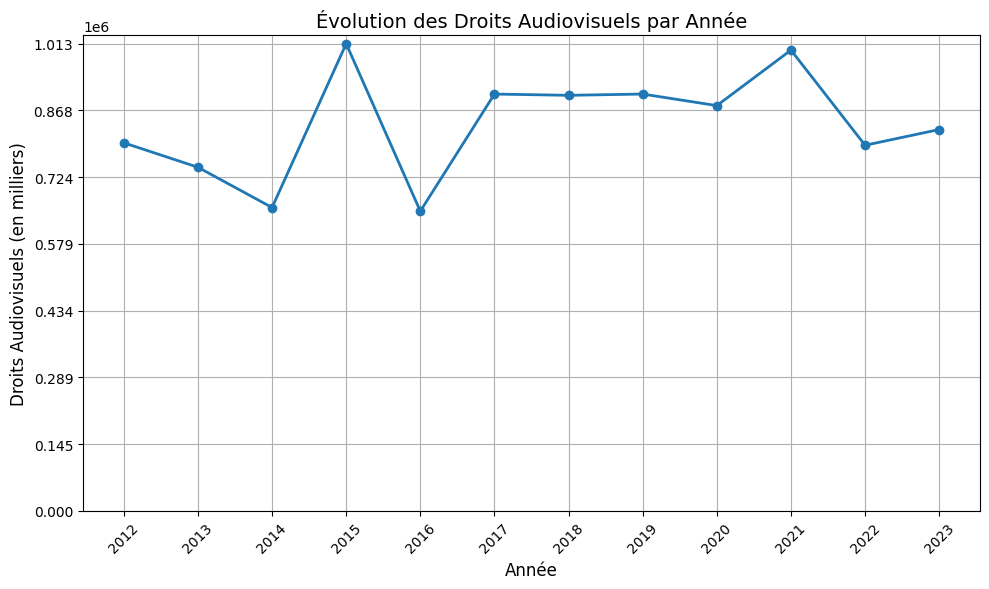

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Charger les données
file_path = '/mnt/data/df_DNCG (8).csv'


# Regrouper les données par année et sommer les droits audiovisuels
yearly_audiovisual_revenue = df.groupby('Année')['Droits audiovisuels'].sum()

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(yearly_audiovisual_revenue.index, yearly_audiovisual_revenue.values, marker='o', linestyle='-', linewidth=2)
plt.title('Évolution des Droits Audiovisuels par Année', fontsize=14)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Droits Audiovisuels (en milliers)', fontsize=12)
plt.grid(visible=True)

# Ajuster les graduations sur l'axe des abscisses (Année)
plt.xticks(ticks=yearly_audiovisual_revenue.index, labels=yearly_audiovisual_revenue.index, rotation=45)

# Ajuster les graduations sur l'axe des ordonnées (Droits audiovisuels)
y_min, y_max = 0, yearly_audiovisual_revenue.max()
y_ticks = np.linspace(y_min, y_max, num=8)  # 8 intervalles
plt.yticks(ticks=y_ticks.astype(int))

plt.tight_layout()
plt.show()


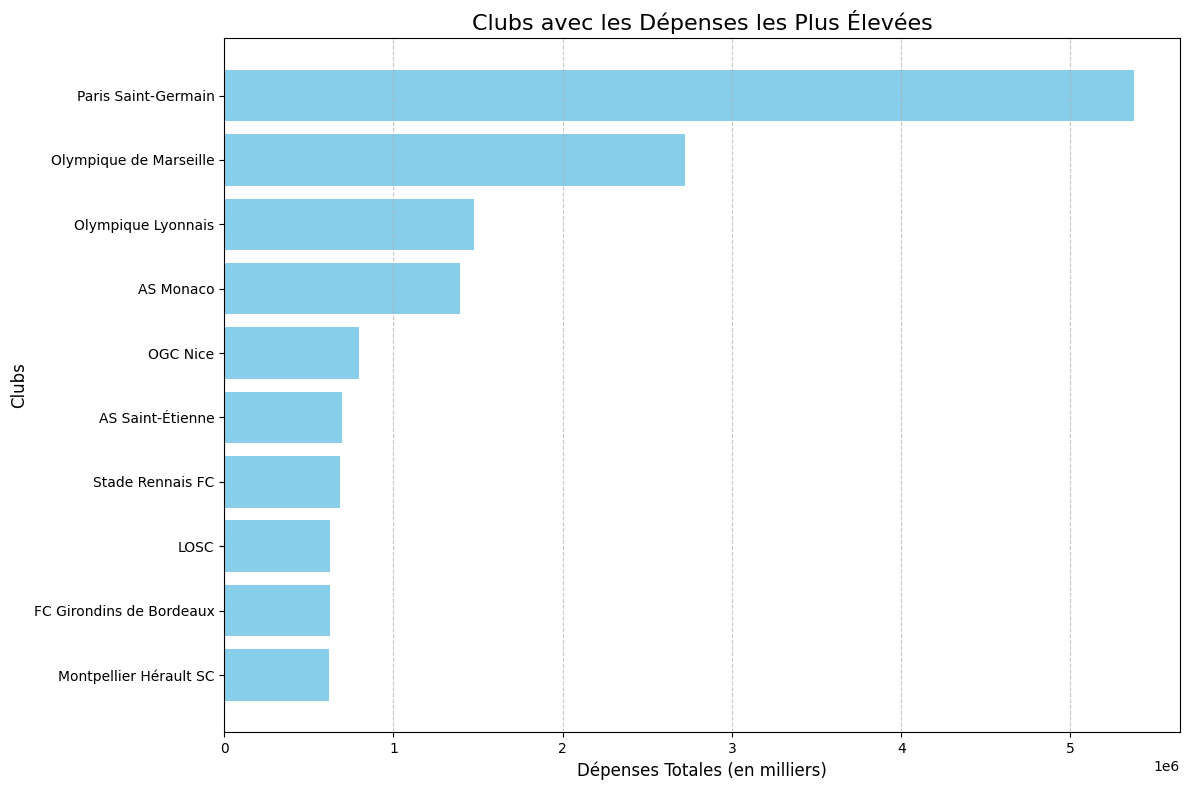

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
file_path = '/mnt/data/df_DNCG (8).csv'


# Calculer les dépenses totales pour chaque club
df['Total Dépenses'] = df['Rémunération personnel'] + df['Autres charges']

# Trier les clubs par dépenses totales en ordre décroissant
top_expenses = df[['Club', 'Total Dépenses']].groupby('Club').sum().sort_values('Total Dépenses', ascending=False).head(10)

# Créer le graphique
plt.figure(figsize=(12, 8))
plt.barh(top_expenses.index, top_expenses['Total Dépenses'], color='skyblue')
plt.title('Clubs avec les Dépenses les Plus Élevées', fontsize=16)
plt.xlabel('Dépenses Totales (en milliers)', fontsize=12)
plt.ylabel('Clubs', fontsize=12)
plt.gca().invert_yaxis()  # Inverser l'axe y pour afficher les plus grandes dépenses en haut
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
